In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/saraasadi/Desktop/housePrice.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
df['Parking'] = df['Parking'].astype(int)
df['Warehouse'] = df['Warehouse'].astype(int)
df['Elevator'] = df['Elevator'].astype(int)

In [4]:
df['total_refahi'] = df['Parking'] + df['Warehouse'] + df['Elevator'] + df['Room']

Some houses do not have addresses, and also the size of some houses is entered incorrectly 
For this purpose I manage these items and remove them from the dataset

In [5]:
# Filter out rows without an address
df = df.dropna(subset=['Address'])

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df['Area'] = df['Area'].str.replace(',', '').str.strip()
df['Area'] = df['Area'].astype(float)
max_area = df['Area'].max()
print("Maximum area of houses:", max_area)


Maximum area of houses: 16160000000.0


In [8]:
max_reasonable_size = 800

# Filter out rows where the area is unreasonably high
df = df[df['Area'] <= max_reasonable_size]

df.reset_index(drop=True, inplace=True)

In [9]:
df['Area'].max()

750.0

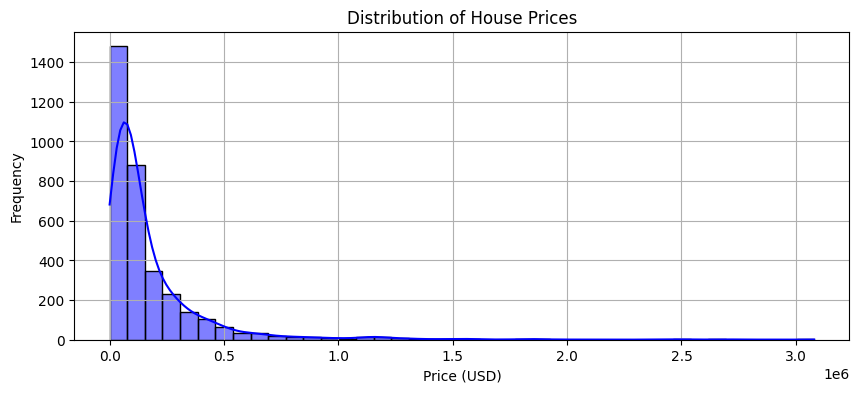

In [10]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Price(USD)'], kde=True, color='blue', bins=40)
plt.title('Distribution of House Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

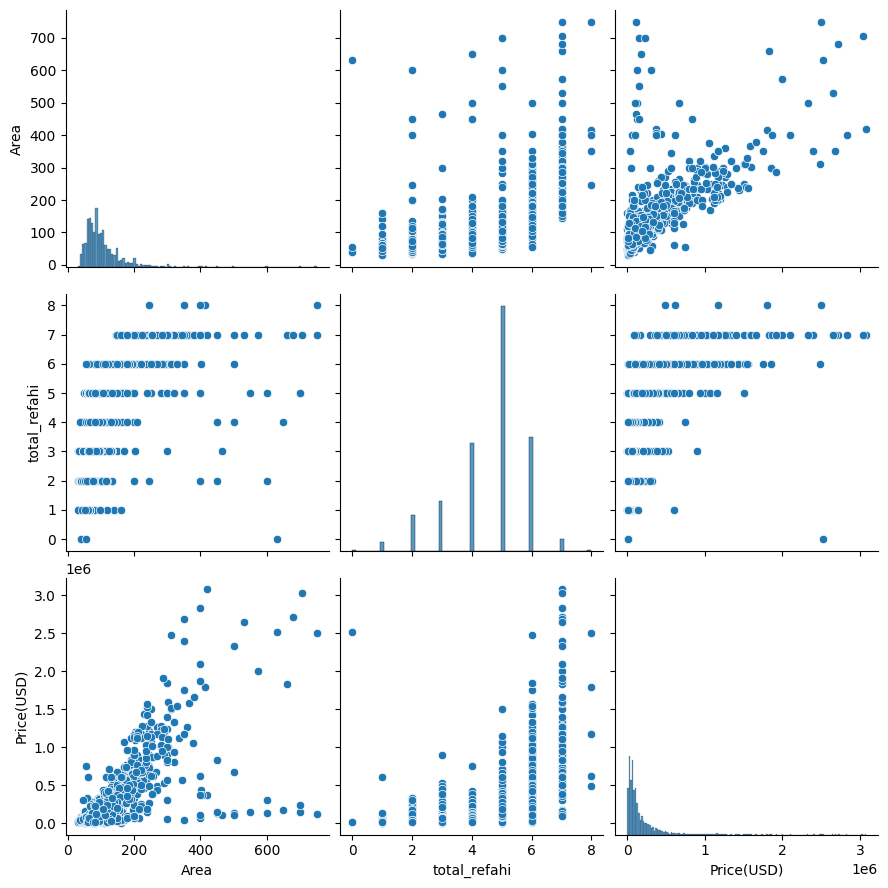

In [11]:
sns.pairplot(df[['Area', 'total_refahi', 'Price(USD)']], height=3)
plt.show()

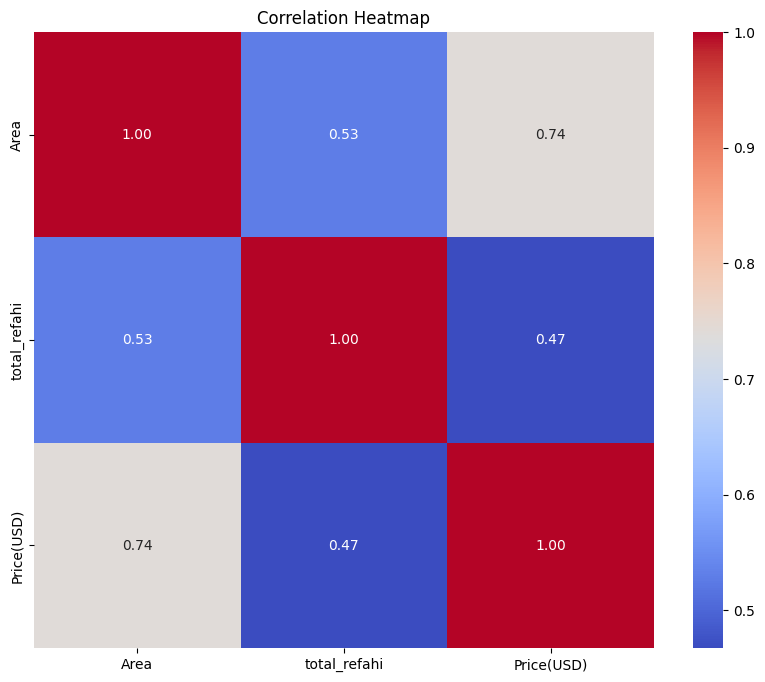

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Area', 'total_refahi', 'Price(USD)']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [13]:
X = df[['Area', 'total_refahi']]
y = df['Price(USD)']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
pred = model.predict(X_test)
pred

array([ 1.58704082e+03,  3.30326532e+05,  1.25088380e+05, -2.29631706e+04,
        1.43688610e+05,  2.23403877e+05,  7.66235886e+04,  3.67659547e+04,
        1.56974488e+05,  1.30402732e+05,  6.33377106e+04,  3.56898288e+05,
        2.18089526e+05,  5.00518326e+04,  4.87805705e+04,  4.23327678e+05,
        2.36689755e+05,  1.96832122e+05,  2.24039509e+05,  1.69624734e+05,
        7.92807642e+04,  1.91517770e+05,  6.59948862e+04,  3.56262657e+05,
       -7.07923314e+04,  1.59631663e+05,  7.13092374e+04,  5.96679723e+05,
        1.01941987e+04,  1.41031434e+05,  7.72592197e+04,  5.96044092e+05,
        1.95516389e+04,  9.55856761e+03, -4.15633998e+04, -4.35849443e+04,
       -3.09346974e+04,  1.08509696e+05,  6.76394991e+05, -5.75064534e+04,
        1.70260366e+05,  1.22431205e+05,  1.64946014e+05,  1.86203419e+05,
        1.76583699e+06,  3.83470044e+05,  3.41087791e+04,  5.00518326e+04,
        5.96044092e+05,  3.40955235e+05,  1.59631663e+05,  1.29767101e+05,
        2.34800767e+04,  

In [17]:
mse = mean_squared_error(y_test, pred)
print('Mean Squared Error:', mse)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 26716727407.618443
Coefficients: [ 2657.1755962  27207.38704074]
Intercept: -231494.12928351993


In [18]:
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
pred2 = model2.predict(X_test)


mse = mean_squared_error(y_test, pred2)
print('Mean Squared Error:', mse)

Mean Squared Error: 27106634958.04992


In [20]:
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [21]:
model3 = LinearRegression()
model3.fit(X_train_poly, y_train)

LinearRegression()

In [22]:
pred3 = model3.predict(X_test_poly)

mse = mean_squared_error(y_test, pred3)
print('Mean Squared Error:', mse)

Mean Squared Error: 24469621651.09176


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model4 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  
])

In [25]:
model4.compile(optimizer='adam', loss='mean_squared_error')

model4.fit(X_train, y_train, epochs=80, batch_size=32, verbose=0)

In [26]:
pred4 = model4.predict(X_test)
mse = mean_squared_error(y_test, pred4)
print('Mean Squared Error:', mse)

22/22 [==============================] - 0s 228us/step
Mean Squared Error: 33984766967.31188


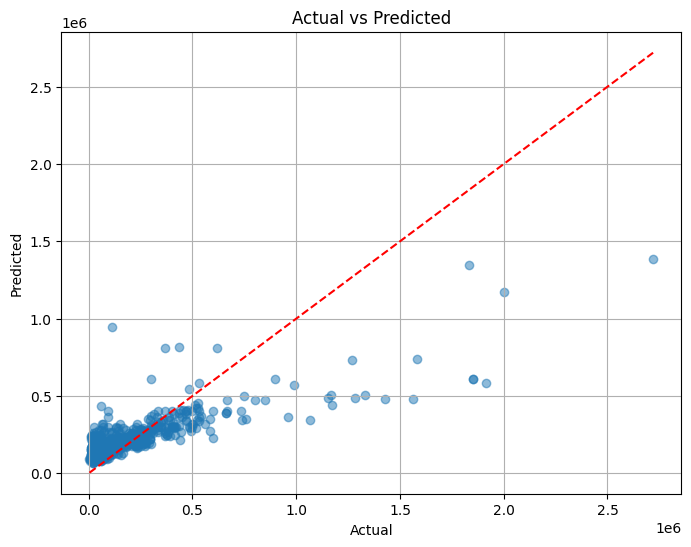

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred4, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


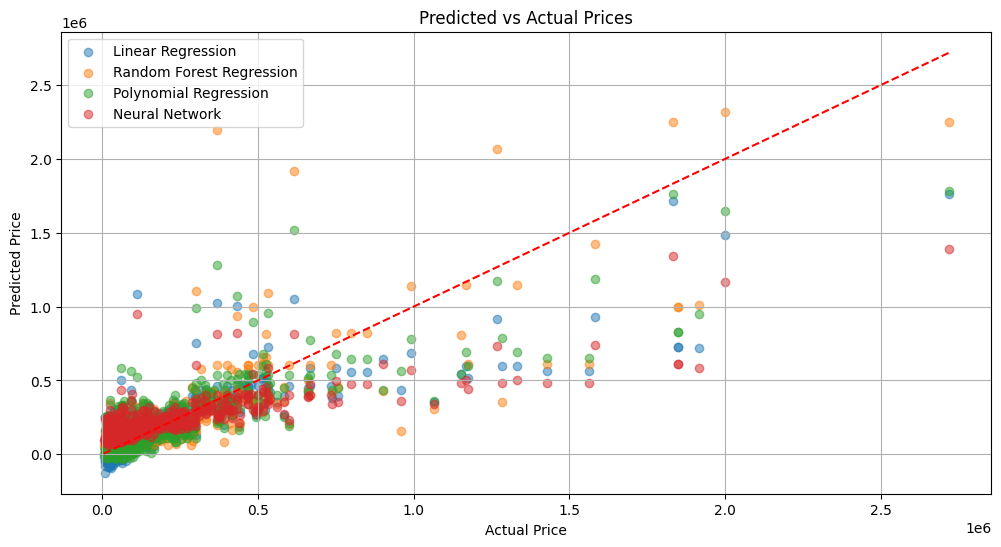

In [28]:
plt.figure(figsize=(12, 6))

# Linear Regression
plt.scatter(y_test, pred, label='Linear Regression', alpha=0.5)

# Random Forest Regression
plt.scatter(y_test, pred2, label='Random Forest Regression', alpha=0.5)

# Polynomial Regression
plt.scatter(y_test, pred3, label='Polynomial Regression', alpha=0.5)

# Neural Network
plt.scatter(y_test, pred4, label='Neural Network', alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line

plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

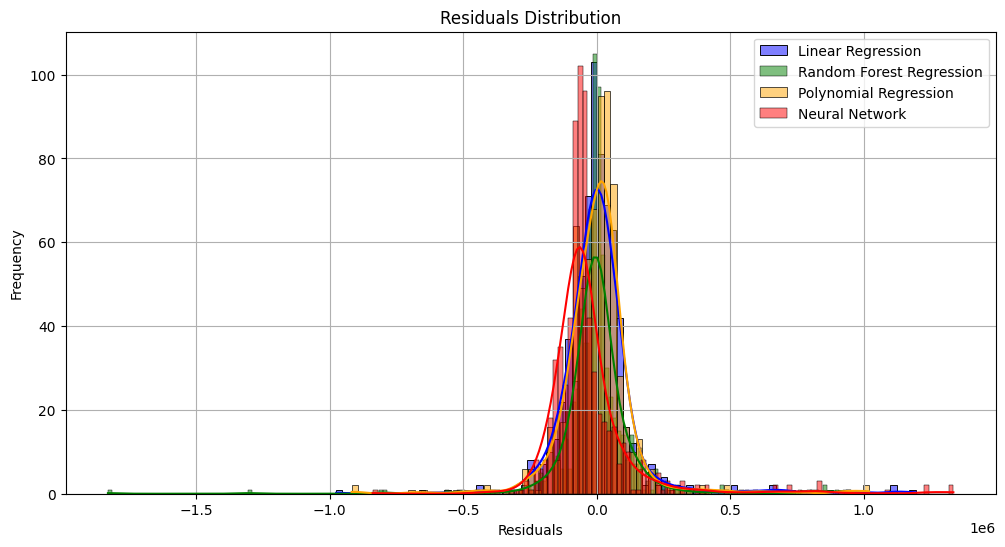

In [29]:
# Residuals plot for all models
plt.figure(figsize=(12, 6))

# Linear Regression
sns.histplot((y_test - pred), kde=True, color='blue', label='Linear Regression', alpha=0.5)

# Random Forest Regression
sns.histplot((y_test - pred2), kde=True, color='green', label='Random Forest Regression', alpha=0.5)

# Polynomial Regression
sns.histplot((y_test - pred3), kde=True, color='orange', label='Polynomial Regression', alpha=0.5)

# Neural Network
sns.histplot((y_test - pred4.flatten()), kde=True, color='red', label='Neural Network', alpha=0.5)

plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
